## First trips of bikes

In notebook [4.e-Strange-Pattern-Found.ipynb](4.e-Strange-Pattern-Found.ipynb) we have found that those one-hour trips tend to happen at the first day of a new bike.

Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from yellow import trips as yt
from yellow import plots

Input data

In [2]:
trips = pd.read_csv('~/saida.csv')
cities = pd.read_csv('~/cities.csv')
stats = pd.read_csv('~/traj-stats.csv')
trips = trips.merge(cities[cities.city == 'São Paulo'], on='tripid') \
             .merge(stats, on='tripid')

First trip of each bike

In [3]:
trips['start_time'] = yt.extract_start_times(trips)
bike_appearance = trips.groupby('bikeid', as_index=False).agg({'start_time': 'min'})
merge = trips.merge(bike_appearance, on=['bikeid', 'start_time'])
len(bike_appearance), len(merge), len(merge.tripid.unique())

(2165, 2165, 2165)

Some stats

In [4]:
stat = merge.total_duration / 60
display(stat.describe())
plt.figure(figsize=(10, 10))
plots.dist_chart(stat[stat < 100], 'First trip of bikes', 'trip duration (min)')
plt.show()

count     1702.000000
mean        38.955666
std        610.816822
min          0.000133
25%          0.469696
50%          6.395067
75%         13.418329
max      21077.570667
Name: total_duration, dtype: float64

count     1702.000000
mean        30.119617
std        610.554451
min          0.000133
25%          0.102238
50%          0.199925
75%          0.385621
max      21074.543950
Name: take_time_max, dtype: float64

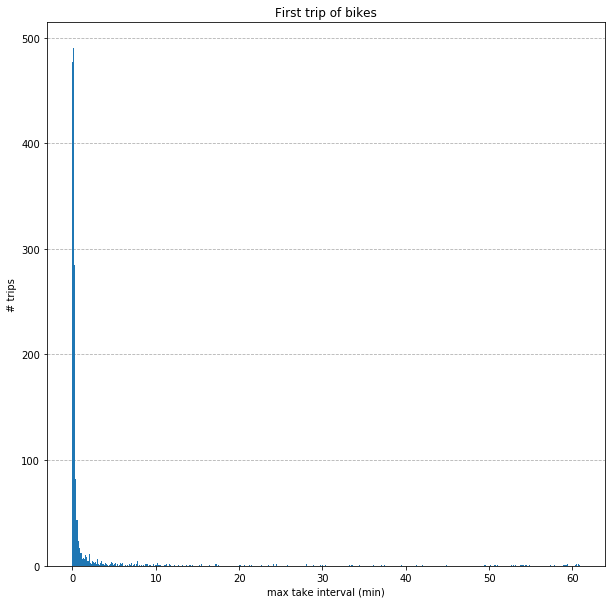

In [5]:
stat = merge.take_time_max / 60
display(stat.describe())
plt.figure(figsize=(10, 10))
plots.dist_chart(stat[stat < 100], 'First trip of bikes', 'max take interval (min)')
plt.show()

In [6]:
stat = merge.total_distance
display(stat.describe())
plt.figure(figsize=(10, 10))
plots.dist_chart(stat[stat < 100], 'First trip of bikes', 'travelled distance (m)')
plt.show()

count      1702.000000
mean       1973.526956
std        9132.550220
min           0.000000
25%           0.181518
50%         906.049016
75%        1999.658646
max      271001.814212
Name: total_distance, dtype: float64

The first 'trips' tend to have no significant duration or movement. 
* So we take 'valid' trips at their first 5 days, as found in the previously referred notebook

In [15]:
bike_ages = trips[(trips.total_distance >= 50) & (trips.total_duration >= 60)] \
            .merge(bike_appearance.rename(columns={'start_time': 'first_appearance'}), on='bikeid')
bike_ages['age'] = (bike_ages.start_time - bike_ages.first_appearance).astype('timedelta64[h]') / 24
first_days = bike_ages[bike_ages.age <= 5]
len(first_days)

31213

count    31213.000000
mean        19.538466
std        194.616039
min          1.001483
25%          5.656433
50%          9.594100
75%         17.519900
max      21837.108233
Name: total_duration, dtype: float64

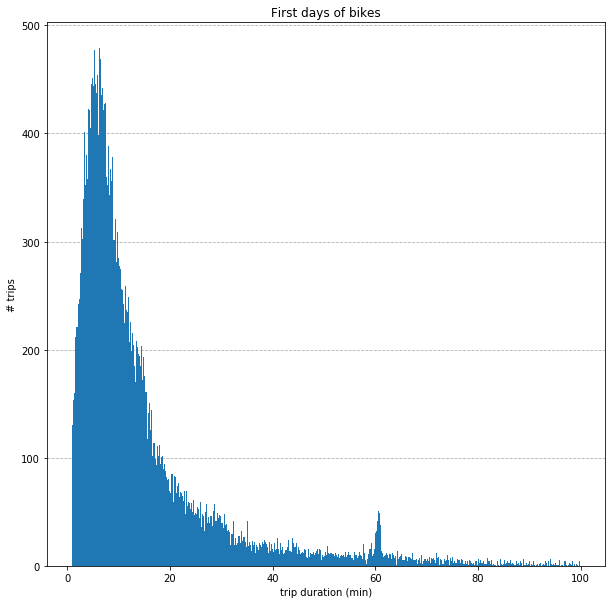

In [16]:
stat = first_days.total_duration / 60
display(stat.describe())
plt.figure(figsize=(10, 10))
plots.dist_chart(stat[stat < 100], 'First days of bikes', 'trip duration (min)')
plt.show()

count    3.121300e+04
mean     3.744623e+02
std      1.151371e+04
min      2.519000e+00
25%      1.054000e+01
50%      1.612600e+01
75%      3.293500e+01
max      1.281872e+06
Name: take_time_max, dtype: float64

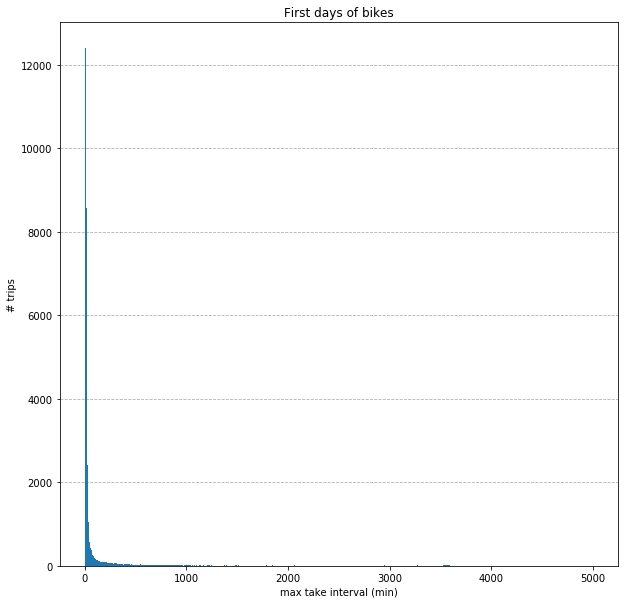

In [17]:
stat = first_days.take_time_max
display(stat.describe())
plt.figure(figsize=(10, 10))
plots.dist_chart(stat[stat < 5000], 'First days of bikes', 'max take interval (min)')
plt.show()

count    31213.000000
mean         2.833235
std         12.897462
min          0.050082
25%          0.816682
50%          1.432456
75%          2.604494
max       1115.354281
Name: total_distance, dtype: float64

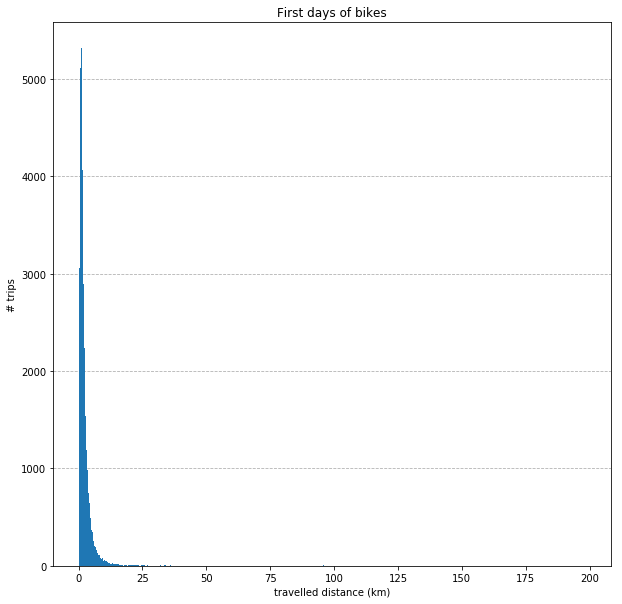

In [19]:
stat = first_days.total_distance / 1000
display(stat.describe())
plt.figure(figsize=(10, 10))
plots.dist_chart(stat[stat < 200], 'First days of bikes', 'travelled distance (km)')
plt.show()

How about after the first 5 days?

In [21]:
other_days = bike_ages[bike_ages.age > 5]
len(other_days)

203511

count    203511.000000
mean         19.581218
std         160.425285
min           1.000050
25%           5.471108
50%           9.569150
75%          18.446417
max       42621.611833
Name: total_duration, dtype: float64

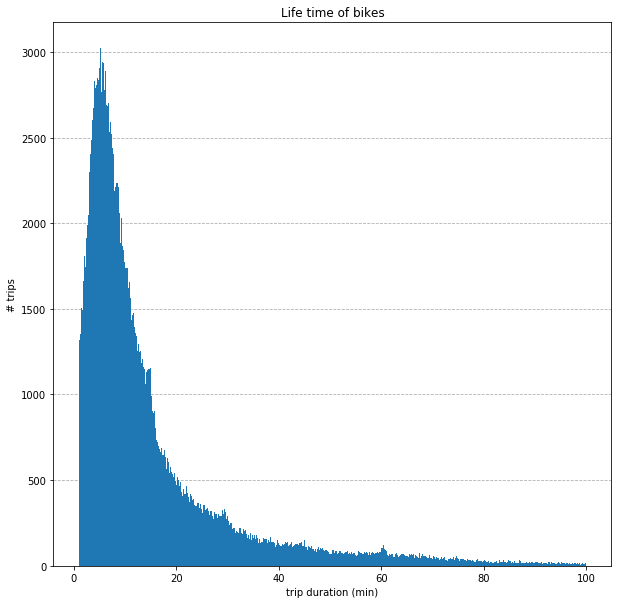

In [22]:
stat = other_days.total_duration / 60
display(stat.describe())
plt.figure(figsize=(10, 10))
plots.dist_chart(stat[stat < 100], 'Life time of bikes', 'trip duration (min)')
plt.show()

In [23]:
stat = other_days.take_time_max
display(stat.describe())
plt.figure(figsize=(10, 10))
plots.dist_chart(stat[stat < 5000], 'Life time of bikes', 'max take interval (min)')
plt.show()

count    2.035110e+05
mean     3.298108e+02
std      8.691822e+03
min      1.994000e+00
25%      1.001900e+01
50%      1.627900e+01
75%      3.741100e+01
max      2.150238e+06
Name: take_time_max, dtype: float64

In [24]:
stat = other_days.total_distance / 1000
display(stat.describe())
plt.figure(figsize=(10, 10))
plots.dist_chart(stat[stat < 200], 'Life time of bikes', 'travelled distance (km)')
plt.show()

count    203511.000000
mean          3.123387
std          15.930014
min           0.050001
25%           0.773767
50%           1.389665
75%           2.628240
max        2258.983093
Name: total_distance, dtype: float64